In [1]:
import uproot4
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib import cm
from matplotlib.colors import LogNorm, Normalize
import awkward1 as ak
from lxml import etree as ET

from event_display import get_module_geometry, get_module_positions, plot_calorimeter_hits


In [5]:
# Load geometry file
geometry_xml = ET.parse("../work/calib_gam_y80cm_3GeV_10000evt.ana.root")

# Data file name
#data_file_name = "g4e_pgun_e_1GeV_10evt.root"
data_file_name = "../work/eD_5x50_1000k-evt.root"
# data_file_name = "g4e_pgun_e_6GeV_10evt.root"

# Number of events to process:
start_event=1
process_events=1


In [5]:
pwo_size_x, pwo_size_y, pwo_size_z, unit = get_module_geometry('ce_EMCAL_detPWO', geometry_xml)
print(f"PWO module size: size_x={pwo_size_x:.2f}{unit} size_y={pwo_size_y:.2f}{unit} size_z={pwo_size_z:>.2f}{unit}")

pos_by_id = get_module_positions('ce_EMCAL_detPWO', geometry_xml)
print(f"Total PWO modules: {len(pos_by_id)}")

ERROR! Session/line number was not unique in database. History logging moved to new session 177
PWO module size: size_x=2.00cm size_y=2.00cm size_z=20.00cm
Total PWO modules: 6528


8 * {"ce_emcal": var * {"id": int32, "adc": float64}}


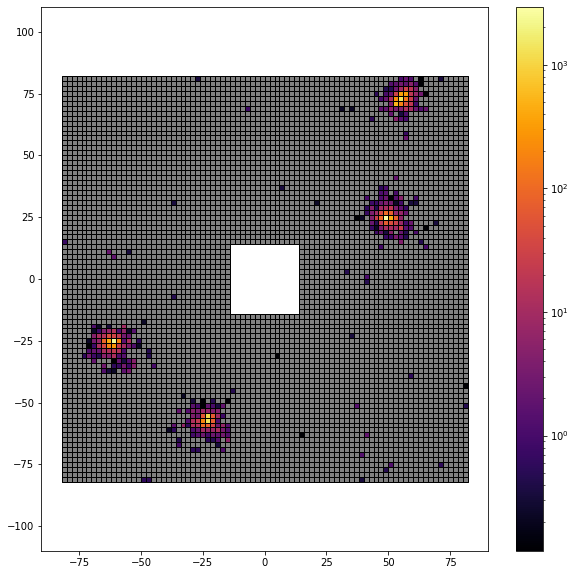

In [6]:
# Open file and get hits in events
root_file = uproot4.open(data_file_name)
fig, ax = plt.subplots(figsize=(10,10))

norm, cmap, _ = plot_calorimeter_hits(root_file, ax, pos_by_id, pwo_size_x, pwo_size_y, start_event, process_events)

ax.axis('equal')
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
plt.show()

